In [5]:
# q1 compute pmf
# generate all 32 possibilities
streaks = []
def generate(i, s):
    if i == 5:
        streaks.append(s)
        return
    generate(i+1, s + [1])
    generate(i+1, s + [0])
generate(0, [])

In [9]:
# COUNT max sequence of 1s
def count_max(l):
    m = 0
    max_len = 0
    for i in l:
        if i == 1:
            m += 1
        else:
            m = 0
        max_len = max(m, max_len)
    return max_len
sequence = [0] * 6
for k in streaks:
    sequence[count_max(k)] += 1

In [13]:
pmf = [i / 32 for i in sequence]
pmf

[0.03125, 0.375, 0.34375, 0.15625, 0.0625, 0.03125]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
np.random.seed(2017)

def pmf_longest_streak(n, tries):
    # Write your Monte Carlo code here, n is the length of the sequence and tries is the number
    # of sampled sequences used to produce the estimate of the pmf
    pmf = np.zeros(n+1)
    for i in range(tries):
        sample = np.random.binomial(1, 0.5, n)
        pmf[count_max(sample)] += 1
    return pmf / tries

tries: 1000.0
tries: 5000.0
tries: 10000.0
tries: 50000.0
tries: 100000.0
tries: 1000.0
tries: 5000.0
tries: 10000.0
tries: 50000.0
tries: 100000.0
The probability that the longest streak of ones in a Bernoulli iid sequence of length 200 has length 8 or more is 
0.3163400000000001


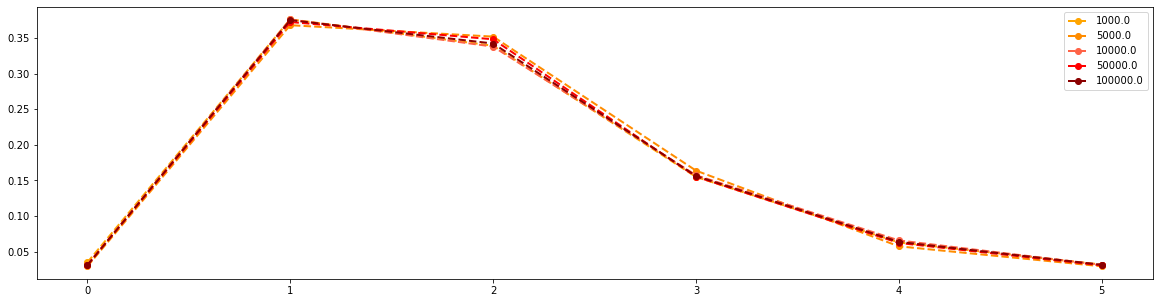

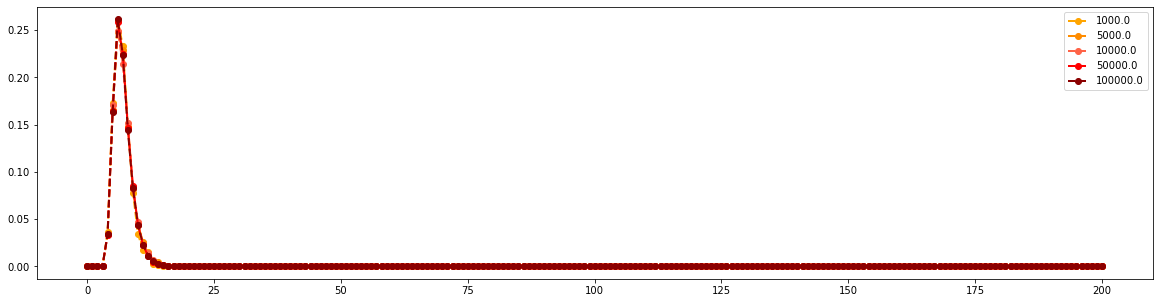

In [24]:
n_tries = [1e3,5e3,1e4,5e4,1e5]

n_vals = [5,200]

color_array = ['orange','darkorange','tomato','red', 'darkred', 'tomato', 'purple', 'grey', 'deepskyblue', 
               'maroon','darkgray','darkorange', 'steelblue', 'forestgreen', 'silver']
for ind_n in range(len(n_vals)):
    n = n_vals[ind_n]
    plt.figure(figsize=(20,5))
    for ind_tries in range(len(n_tries)):
        tries = n_tries[ind_tries]
        print("tries: " + str(tries))
        pmf_longest_tries = pmf_longest_streak(n, np.int(tries))
        plt.plot(range(n+1),pmf_longest_tries, marker='o',markersize=6,linestyle="dashed",lw=2,
                 color=color_array[ind_tries],
                 markeredgecolor= color_array[ind_tries],label=str(tries))
    plt.legend()
    
print("The probability that the longest streak of ones in a Bernoulli iid sequence of length 200 has length 8 or more is ")
print(sum(pmf_longest_tries[8:]))